  # Step 1: import library required for given project

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import pickle


 # Step 2: data collection and data load

In [12]:
df = pd.read_csv("fra_perfumes.csv")

 # step 3: Exploratory Data Analysis

In [13]:
df.head()

,Perfume Name,Gender,Rating Value,Rating Count,Main Accords,Perfumers,Description,url
0,9am Afnanfor women,for women,3.73,174,"['citrus', 'musky', 'woody', 'aromatic', 'warm...",[],9ambyAfnanis a fragrance for women. Top notes ...,https://www.fragrantica.com/perfume/Afnan/9am-...
1,9am Dive Afnanfor women and men,for women and men,4.29,842,"['fruity', 'woody', 'green', 'warm spicy', 'ar...",[],9am DivebyAfnanis a Aromatic Aquatic fragrance...,https://www.fragrantica.com/perfume/Afnan/9am-...
2,9am pour Femme Afnanfor women,for women,4.00,68,"['fruity', 'musky', 'amber', 'citrus', 'powder...",[],9am pour FemmebyAfnanis a Amber fragrance for ...,https://www.fragrantica.com/perfume/Afnan/9am-...
3,9pm Afnanfor men,for men,4.50,"6,865","['vanilla', 'amber', 'warm spicy', 'cinnamon',...",[],9pmbyAfnanis a Amber Vanilla fragrance for men...,https://www.fragrantica.com/perfume/Afnan/9pm-...
4,9pm pour Femme Afnanfor women,for women,3.49,63,"['woody', 'aromatic', 'rose', 'fruity', 'powde...",[],9pm pour FemmebyAfnanis a Amber Floral fragran...,https://www.fragrantica.com/perfume/Afnan/9pm-...


In [14]:
df.tail()

,Perfume Name,Gender,Rating Value,Rating Count,Main Accords,Perfumers,Description,url
70098,Mystique Femme Al Haramain Perfumesfor women,for women,3.83,99,"['fruity', 'fresh', 'rose', 'floral', 'sweet',...",[],Mystique FemmebyAl Haramain Perfumesis a Flora...,https://www.fragrantica.com/perfume/Al-Haramai...
70099,Mirsaal of Trust Afnanfor men,for men,4.24,406,"['amber', 'woody', 'fruity', 'warm spicy', 'mu...",[],Mirsaal of TrustbyAfnanis a Amber Spicy fragra...,https://www.fragrantica.com/perfume/Afnan/Mirs...
70100,Atifa Noir Al Haramain Perfumesfor women,for women,4.02,47,"['amber', 'warm spicy', 'sweet', 'musky', 'car...",['Christian Carbonnel'],Atifa NoirbyAl Haramain Perfumesis a Amber Van...,https://www.fragrantica.com/perfume/Al-Haramai...
70101,Matar Al Hub Al Haramain Perfumesfor women and...,for women and men,4.02,52,"['rose', 'powdery', 'amber', 'woody', 'oud', '...",[],Matar Al HubbyAl Haramain Perfumesis a Amber f...,https://www.fragrantica.com/perfume/Al-Haramai...
70102,Classic Al Haramain Perfumesfor women,for women,3.90,10,"['sweet', 'woody', 'white floral', 'vanilla', ...",[],ClassicbyAl Haramain Perfumesis a Floral fragr...,https://www.fragrantica.com/perfume/Al-Haramai...


In [15]:
df.columns

for cols in df.columns:
        print(cols)

Perfume Name
Gender
Rating Value
Rating Count
Main Accords
Perfumers
Description
url


In [16]:
df.count()

Perfume Name    70100
Gender          70100
Rating Value    63922
Rating Count    63922
Main Accords    70103
Perfumers       70103
Description     70100
url             70103
dtype: int64

In [17]:
df.describe()

,Rating Value
count,63922.000000
mean,3.976368
std,0.522706
min,1.000000
25%,3.750000
50%,4.000000
75%,4.250000
max,5.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70103 entries, 0 to 70102
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Perfume Name  70100 non-null  object 
 1   Gender        70100 non-null  object 
 2   Rating Value  63922 non-null  float64
 3   Rating Count  63922 non-null  object 
 4   Main Accords  70103 non-null  object 
 5   Perfumers     70103 non-null  object 
 6   Description   70100 non-null  object 
 7   url           70103 non-null  object 
dtypes: float64(1), object(7)
memory usage: 4.3+ MB


In [19]:
df.shape
print(f"Number of Rows: {df.shape[0]} and Number of Columns: {df.shape[1]}")

Number of Rows: 70103 and Number of Columns: 8


In [20]:
df.nunique()

Perfume Name    69562
Gender              3
Rating Value      294
Rating Count     2913
Main Accords    63372
Perfumers        2129
Description     69925
url             69948
dtype: int64

In [21]:
df.isnull().sum()

Perfume Name       3
Gender             3
Rating Value    6181
Rating Count    6181
Main Accords       0
Perfumers          0
Description        3
url                0
dtype: int64

 # step 4: EDA Analysis

# Histplot

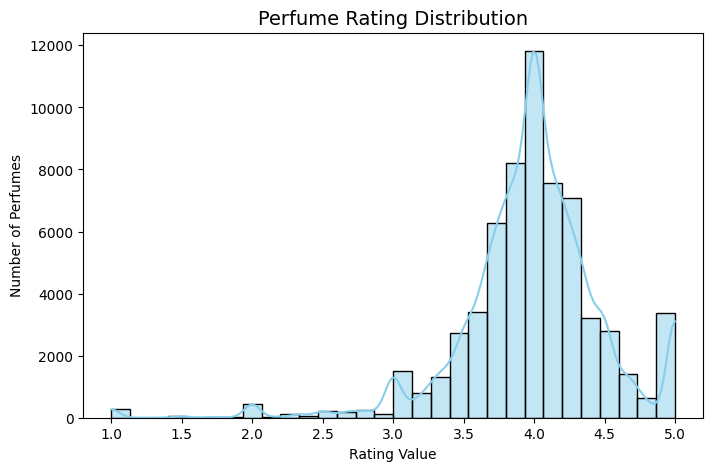

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Rating Value'], bins=30, kde=True, color='skyblue')
plt.title("Perfume Rating Distribution", fontsize=14)
plt.xlabel("Rating Value")
plt.ylabel("Number of Perfumes")
plt.show()


# Bar plot

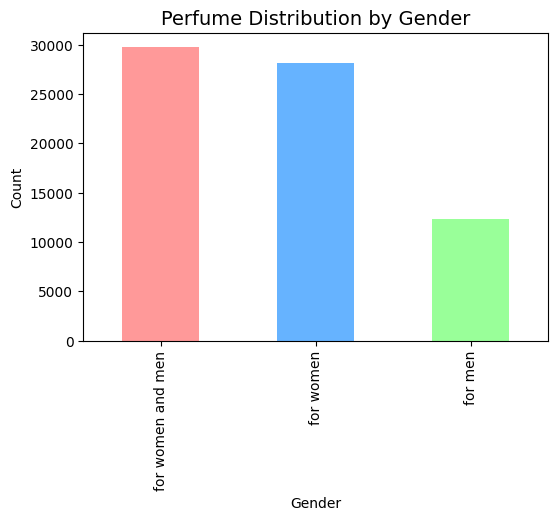

In [23]:

plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Perfume Distribution by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



# Box plot

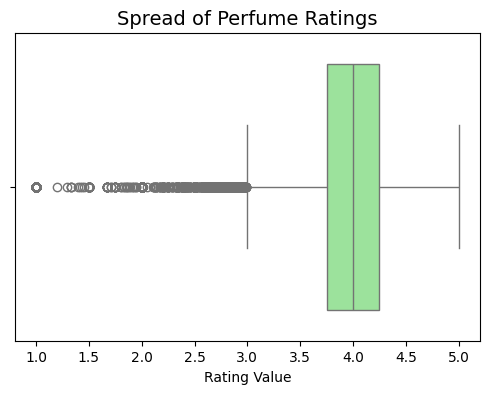

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Rating Value'], color='lightgreen')
plt.title("Spread of Perfume Ratings", fontsize=14)
plt.xlabel("Rating Value")
plt.show()


# Bar plot

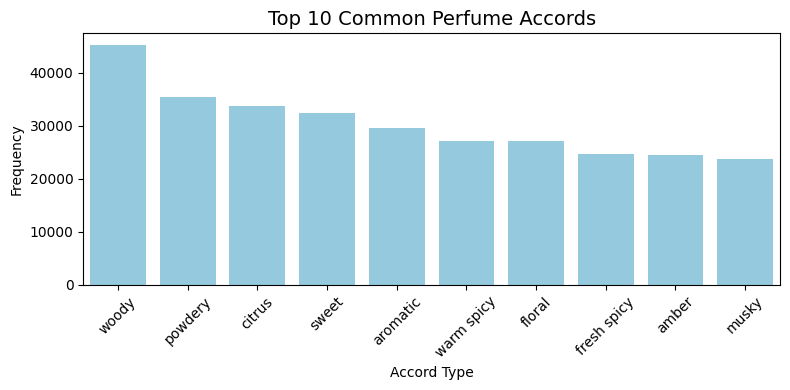

In [5]:


df = pd.read_csv("fra_perfumes.csv")
accords_series = (
    df['Main Accords']
    .astype(str)
    .str.strip("[]")
    .str.replace("'", "")
    .str.split(', ')
)

all_accords = Counter([a.strip() for sublist in accords_series for a in sublist if a])
top_accords = dict(all_accords.most_common(10))
plt.figure(figsize=(8, 4))
sns.barplot(x=list(top_accords.keys()), y=list(top_accords.values()), color='skyblue')
plt.title("Top 10 Common Perfume Accords", fontsize=14)
plt.xlabel("Accord Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# heat map

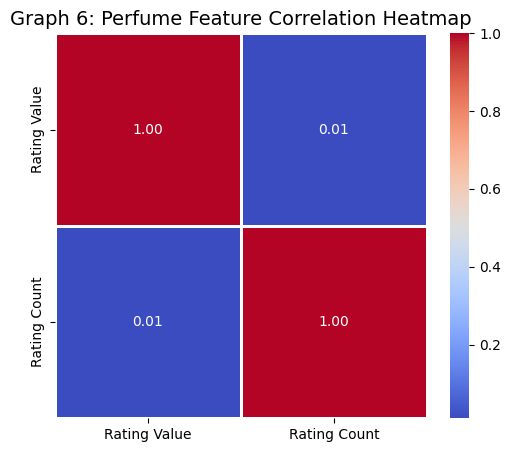

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("fra_perfumes.csv", encoding='latin1')
df['Rating Count'] = df['Rating Count'].astype(str).str.replace(',', '')
df['Rating Count'] = pd.to_numeric(df['Rating Count'], errors='coerce')
numeric_df = df[['Rating Value', 'Rating Count']].dropna()
corr = numeric_df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Graph 6: Perfume Feature Correlation Heatmap", fontsize=14)
plt.show()


# Data spliting

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("fra_perfumes.csv", encoding='latin1')
df = df.drop_duplicates()
df['Rating Value'] = df['Rating Value'].fillna(df['Rating Value'].mean())
df['Gender'] = df['Gender'].fillna('Unknown')
df['Description'] = df['Description'].fillna('No description available')
df['Rating Count'] = df['Rating Count'].astype(str).str.replace(',', '')
df['Rating Count'] = pd.to_numeric(df['Rating Count'], errors='coerce')
X = df[['Description', 'Main Accords', 'Gender']]
y = df['Rating Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (55992, 3)
X_test shape: (13999, 3)
y_train shape: (55992,)
y_test shape: (13999,)


# Model train

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
df = pd.read_csv("fra_perfumes.csv", encoding='latin1', on_bad_lines='skip')
for col in ['Name', 'Description', 'Main Accords']:
    if col not in df.columns:
        df[col] = ''
    df[col] = df[col].fillna('').astype(str)

df['combined_features'] = (df['Description'] + ' ' + df['Main Accords']).str.strip()
df = df[df['combined_features'].str.len() > 0].reset_index(drop=True)
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(tfidf_matrix)

print("Model training complete! (NearestNeighbors used instead of cosine matrix)")
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")
def recommend_perfume(perfume_name, n=5):
    perfume_name = perfume_name.strip().lower()
    matches = df[df['Name'].str.lower() == perfume_name]
    if matches.empty:
        return f"'{perfume_name}' not found in dataset."
    
    index = matches.index[0]
  
    distances, indices = model.kneighbors(tfidf_matrix[index], n_neighbors=n+1)
    recommendations = [df.iloc[i]['Name'] for i in indices.flatten()[1:]]  
    return recommendations



Model training complete! (NearestNeighbors used instead of cosine matrix)
TF-IDF Matrix Shape: (70103, 85892)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import pickle

df = pd.read_csv("fra_perfumes.csv")  

df['Rating Count'] = df['Rating Count'].fillna(0)  
df['Rating Value'] = df['Rating Value'].fillna(df['Rating Value'].mean())  


df['Rating Count'] = df['Rating Count'].astype(str).str.replace(',', '').astype(int)


df['Gender'] = df['Gender'].map({"Male": 0, "Female": 1}).fillna(0)


X = df[['Gender', 'Rating Value', 'Rating Count']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = NearestNeighbors(n_neighbors=5)
model.fit(X_scaled)

pickle.dump({"model": model, "scaler": scaler}, open("perfume_nn_model_numeric.pkl", "wb"))


In [30]:
df.columns

Index(['Perfume Name', 'Gender', 'Rating Value', 'Rating Count',
       'Main Accords', 'Perfumers', 'Description', 'url'],
      dtype='object')

# Saving in pickle

In [ ]:
import pickle

with open("perfume_nn_model.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "vectorizer": vectorizer,
        "df": df
    }, f)

with open("perfume_nn_model.pkl", "rb") as f:
    data = pickle.load(f)

model = data["model"]
vectorizer = data["vectorizer"]
df = data["df"]


In [ ]:
def recommend_perfume(perfume_name, n=5):
    perfume_name = perfume_name.strip().lower()
    matches = df[df['Name'].str.lower() == perfume_name]
    
    if matches.empty:
        return f"'{perfume_name}' not found in dataset."
    
    index = matches.index[0]
    distances, indices = model.kneighbors(tfidf_matrix[index], n_neighbors=n+1)
    
    recommendations = [df.iloc[i]['Name'] for i in indices.flatten()[1:]]
    return recommendations


In [ ]:

perfume = "9pm Afnan"


top_recs = recommend_perfume(perfume, n=5)
print(f"Top recommendations for '{perfume}':")
print(top_recs)


Top recommendations for '9pm Afnan':
'9pm afnan' not found in dataset.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

df = pd.read_csv("fra_perfumes.csv")
cat_cols = df.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols].astype(str))


imputer = SimpleImputer(strategy="median")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


target_column = "Gender"
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

params = {
    'n_estimators': randint(200, 800),
    'learning_rate': uniform(0.05, 0.25),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
}

model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    tree_method='hist'
)

random_search = RandomizedSearchCV(
    model,
    params,
    n_iter=25,  
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("BEST PARAMETERS:", random_search.best_params_)
print("MAXIMUM ACCURACY:", accuracy)


BEST PARAMETERS: {'colsample_bytree': np.float64(0.7076257380232285), 'learning_rate': np.float64(0.07697285674832612), 'max_depth': 9, 'n_estimators': 440, 'subsample': np.float64(0.794306794322898)}
MAXIMUM ACCURACY: 0.7128592825048142
